Download the MNIST dataset and create a custom dataloader using torch.utils.data.Dataset, DataLoader.

Compare the loading performance of your scratch implemented data loader with the one provided by PyTorch across different batch sizes (128, 256, 512, 1024).

Plot a graph illustrating the relationship between batch size and loading time.

In [1]:
# pip install torch torchvision matplotlib


In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import time
import matplotlib.pyplot as plt


c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


verify this and write observations regarding this

c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


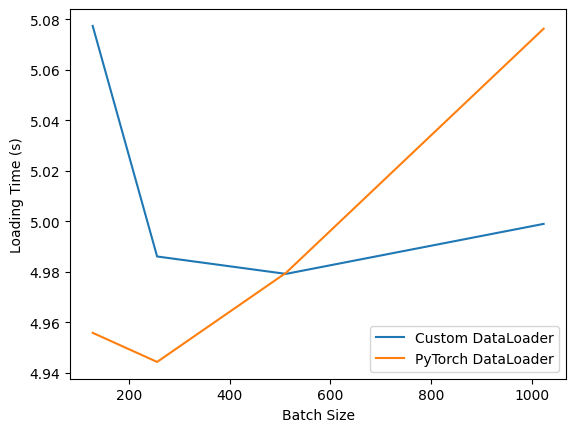

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt


class MNISTDataset(Dataset):
    def __init__(self, transform=None):
        self.data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image, label = self.data[index]
        return image, label

def measure_loading_time(dataloader, num_batches):
    start_time = time.time()
    for _ in range(num_batches):
        for data in dataloader:
            pass
    end_time = time.time()
    return (end_time - start_time) / num_batches

batch_sizes = [128, 256, 512, 1024]

custom_loader_times = []
pytorch_loader_times = []

for batch_size in batch_sizes:
    timein = time.time()
    custom_dataset = MNISTDataset(transform=transforms.ToTensor())
    custom_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)
    custom_loading_time = measure_loading_time(custom_dataloader, 1) 
    custom_loader_times.append(custom_loading_time )

    timein_pytorch = time.time()
    pytorch_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
    pytorch_dataloader = DataLoader(pytorch_dataset, batch_size=batch_size, shuffle=True)
    timeout_pytorch = time.time()
    pytorch_loading_time = measure_loading_time(pytorch_dataloader, 1)  # Measure for 5 batches
    pytorch_loader_times.append(pytorch_loading_time )

# Plot the results
plt.plot(batch_sizes, custom_loader_times, label='Custom DataLoader')
plt.plot(batch_sizes, pytorch_loader_times, label='PyTorch DataLoader')
plt.xlabel('Batch Size')
plt.ylabel('Loading Time (s)')
plt.legend()
plt.show()


##### Custom DataLoader takes more time to load the dataset for all the batch sizes 128, 256, 512, 1024
##### Hence, PyTorch DataLoader performs better in all the cases
##### Pytorch first has increasing time to load all the data atleast till 256 batch size, which decreases steeply after 256 ( which is similar for custom dataloader as well, except for the part where the 256 batch size takes lesser time as compared to 128 )


Question 2 : 
- Relu and SGD optimiser

Epoch 1/60: Train Loss: 2.3025, Val Loss: 2.3025, Test Loss: 2.3025, Train Acc: 0.1122, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 2/60: Train Loss: 2.3025, Val Loss: 2.3024, Test Loss: 2.3024, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 3/60: Train Loss: 2.3024, Val Loss: 2.3024, Test Loss: 2.3024, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 4/60: Train Loss: 2.3023, Val Loss: 2.3023, Test Loss: 2.3023, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 5/60: Train Loss: 2.3023, Val Loss: 2.3022, Test Loss: 2.3022, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 6/60: Train Loss: 2.3022, Val Loss: 2.3022, Test Loss: 2.3022, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 7/60: Train Loss: 2.3021, Val Loss: 2.3021, Test Loss: 2.3021, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 8/60: Train Loss: 2.3021, Val Loss: 2.3020, Test Loss: 2.3020, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 9/60: Train Loss: 

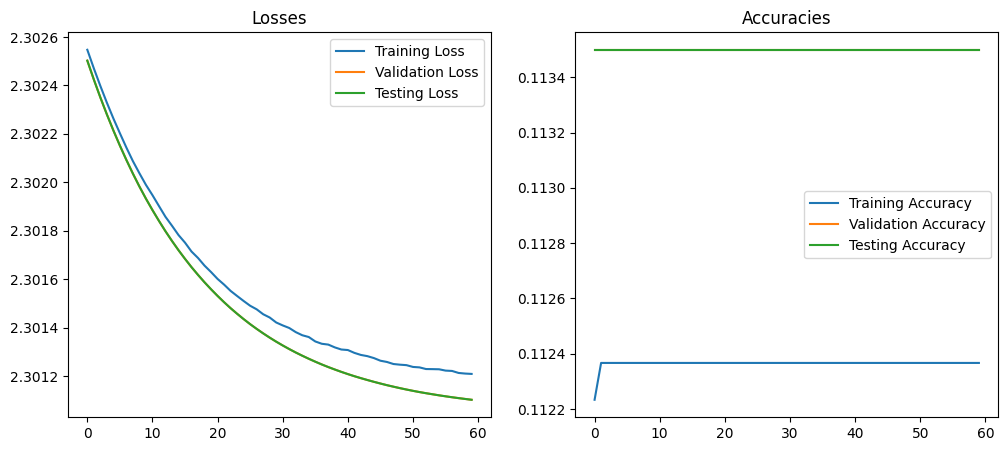

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the neural network architecture
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

# Define the dataset and data loaders
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = 28 * 28
hidden_size = 40
output_size = 10
model = FeedForwardNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0003)

# Training loop
num_epochs = 60
train_losses, val_losses, test_losses = [], [], []
train_accuracies, val_accuracies, test_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    total_loss, correct_train = 0, 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss, correct_val = 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = correct_val / len(test_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Testing
    model.eval()
    test_loss, correct_test = 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_test += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = correct_test / len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs}: "
          f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, "
          f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

# Plotting graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.plot(test_losses, label='Test')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


almost there

In [7]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
# Download MNIST dataset using PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Convert to NumPy arrays
X_train = train_dataset.data.numpy().reshape(-1, 28 * 28).astype(float)
Y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28 * 28).astype(float)
Y_test = test_dataset.targets.numpy()

# Normalize data
X_train = (X_train - 128.0) / 128.0
X_test = (X_test - 128.0) / 128.0
import torch
import torch.nn.functional as F
def predict(model, x):
    fc1, relu1, fc2, relu2, fc3, relu3, fc4, relu4, fc5 = \
        model['W1'], F.relu, model['W2'], F.relu, \
        model['W3'], F.relu, model['W4'], F.relu, model['W5']

    x = torch.tensor(x, dtype=torch.float32)
    z1 = x.mm(fc1) + model['b1']
    a1 = relu1(z1)
    z2 = a1.mm(fc2) + model['b2']
    a2 = relu2(z2)
    z3 = a2.mm(fc3) + model['b3']
    a3 = relu3(z3)
    z4 = a3.mm(fc4) + model['b4']
    a4 = relu4(z4)
    z5 = a4.mm(fc5) + model['b5']
    
    # Apply softmax to get probabilities
    exp_scores = torch.exp(z5)
    probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
    
    # Return the index of the class with the maximum probability
    _, predicted_class = torch.max(probs, 1)
    
    return predicted_class.numpy()

def calculate_loss(model, X, y):
    fc1, relu1, fc2, relu2, fc3, relu3, fc4, relu4, fc5 = \
        model['W1'], F.relu, model['W2'], F.relu, \
        model['W3'], F.relu, model['W4'], F.relu, model['W5']

    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)
    
    z1 = X.mm(fc1) + model['b1']
    a1 = relu1(z1)
    z2 = a1.mm(fc2) + model['b2']
    a2 = relu2(z2)
    z3 = a2.mm(fc3) + model['b3']
    a3 = relu3(z3)
    z4 = a3.mm(fc4) + model['b4']
    a4 = relu4(z4)
    z5 = a4.mm(fc5) + model['b5']
    
    # Apply softmax to get probabilities
    exp_scores = torch.exp(z5)
    probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
    
    num_examples = X.shape[0]
    
    # Use negative log likelihood loss (cross-entropy loss)
    data_loss = F.nll_loss(torch.log(probs), y)
    
    return data_loss.item()  # Convert the PyTorch tensor to a Python float

# Model building and training
def build_model(X, y, nn_hdim, epsilon, num_passes= 60, print_loss=False):
    np.random.seed(0)
    torch.manual_seed(0)

    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    num_examples, input_dim = X.shape
    nn_input_dim = nn_hdim[0]
    print('input dim', nn_input_dim)

    hdim1, hdim2, hdim3, hdim4, hdim5 = nn_hdim[1:]

    W1 = torch.randn(nn_input_dim, hdim1) / np.sqrt(hdim1)
    b1 = torch.zeros(1, hdim1)

    W2 = torch.randn(hdim1, hdim2) / np.sqrt(hdim2)
    b2 = torch.zeros(1, hdim2)

    W3 = torch.randn(hdim2, hdim3) / np.sqrt(hdim3)
    b3 = torch.zeros(1, hdim3)

    W4 = torch.randn(hdim3, hdim4) / np.sqrt(hdim4)
    b4 = torch.zeros(1, hdim4)

    W5 = torch.randn(hdim4, hdim5) / np.sqrt(hdim5)
    b5 = torch.zeros(1, hdim5)

    model = {
        'W1': Variable(W1, requires_grad=True),
        'b1': Variable(b1, requires_grad=True),
        'W2': Variable(W2, requires_grad=True),
        'b2': Variable(b2, requires_grad=True),
        'W3': Variable(W3, requires_grad=True),
        'b3': Variable(b3, requires_grad=True),
        'W4': Variable(W4, requires_grad=True),
        'b4': Variable(b4, requires_grad=True),
        'W5': Variable(W5, requires_grad=True),
        'b5': Variable(b5, requires_grad=True),
    }

    optimizer = torch.optim.SGD(model.values(), lr=epsilon)

    bs = 128

    for i in range(num_passes):
        j = i % (num_examples // bs)

        if j == 0:
            ridx = torch.randperm(num_examples)
            X = X[ridx]
            y = y[ridx]

        Xb = X[j * bs:(j + 1) * bs]
        yb = y[j * bs:(j + 1) * bs]

        optimizer.zero_grad()

        # Forward propagation
        z1 = Xb.mm(model['W1']) + model['b1']
        a1 = F.relu(z1)
        z2 = a1.mm(model['W2']) + model['b2']
        a2 = F.relu(z2)
        z3 = a2.mm(model['W3']) + model['b3']
        a3 = F.relu(z3)
        z4 = a3.mm(model['W4']) + model['b4']
        a4 = F.relu(z4)
        z5 = a4.mm(model['W5']) + model['b5']
        exp_scores = torch.exp(z5)

        # Backpropagation
        delta_loss = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
        delta_loss[range(bs), yb] -= 1

        dW5 = a4.t().mm(delta_loss)
        db5 = torch.sum(delta_loss, dim=0, keepdim=True)
        delta5 = delta_loss.mm(model['W5'].t()) * (z4 > 0).float()
        dW4 = a3.t().mm(delta5)
        db4 = torch.sum(delta5, dim=0, keepdim=True)
        delta4 = delta5.mm(model['W4'].t()) * (z3 > 0).float()
        dW3 = a2.t().mm(delta4)
        db3 = torch.sum(delta4, dim=0, keepdim=True)
        delta3 = delta4.mm(model['W3'].t()) * (z2 > 0).float()
        dW2 = a1.t().mm(delta3)
        db2 = torch.sum(delta3, dim=0, keepdim=True)
        delta2 = delta3.mm(model['W2'].t()) * (z1 > 0).float()
        dW1 = Xb.t().mm(delta2)
        db1 = torch.sum(delta2, dim=0)

        # Update weights
        model['W1'].data -= epsilon * dW1.data
        model['b1'].data -= epsilon * db1.data
        model['W2'].data -= epsilon * dW2.data
        model['b2'].data -= epsilon * db2.data
        model['W3'].data -= epsilon * dW3.data
        model['b3'].data -= epsilon * db3.data
        model['W4'].data -= epsilon * dW4.data
        model['b4'].data -= epsilon * db4.data
        model['W5'].data -= epsilon * dW5.data
        model['b5'].data -= epsilon * db5.data

        if print_loss and i % 2000 == 0:
            epsilon *= 0.99
            y_pred = predict(model, X_test)

            # Convert y_pred to PyTorch tensor
            y_pred_tensor = torch.tensor(y_pred)

            # Convert Y_test to PyTorch tensor
            Y_test_tensor = torch.tensor(Y_test)

            accuracy = torch.sum(y_pred_tensor == Y_test_tensor).float() / Y_test_tensor.shape[0]
            print("loss after iteration {}: {:.2f}, testing accuracy: {:.2f}%".format(i, calculate_loss(model, X, y), accuracy * 100))
# ... (unchanged)

# Test output
X_test0 = X_test[0:3, :]
X_test0 = (X_test0 - 128.0) / 128.0
X_test0 = torch.tensor(X_test0, dtype=torch.float32)
num_examples, input_dim = X_train.shape
epsilon = 0.001
reg_lambda = 0.00

model = build_model(X_train, Y_train, [input_dim, 256, 128, 63, 32, 10], epsilon,  60, print_loss=True)
y_pred0 = predict(model, X_test0)

# Convert Y_test to PyTorch tensor
Y_test_tensor = torch.tensor(Y_test)

# Calculate accuracy
accuracy = torch.sum(y_pred0 == Y_test_tensor).float() / Y_test_tensor.shape[0]
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))

# Display images
X_test0 = X_test0.reshape(3, 28, 28)
plt.figure('First Predicted Image')
plt.imshow(X_test0[0, :, :])
plt.figure('Second Predicted Image')
plt.imshow(X_test0[1, :, :])
plt.figure('Third Predicted Image')
plt.imshow(X_test0[2, :, :])
pylab.show()


input dim 784


C:\Users\Chief Engineer (C)\AppData\Local\Temp\ipykernel_4568\2318668661.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
C:\Users\Chief Engineer (C)\AppData\Local\Temp\ipykernel_4568\2318668661.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.long)


loss after iteration 0: 6.42, testing accuracy: 10.92%


TypeError: 'NoneType' object is not subscriptable

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch

# Define Linear layer  
## backward operation is done with respect to the X
class Linear:
    def __init__(self, input_size, output_size):
        self.weights = torch.randn(output_size, input_size) / input_size
        self.biases = torch.zeros(1, output_size)
        self.input = None

    def forward(self, x):
        self.input = x
        x = x.view(x.size(0), -1)  # Flatten the input
        return x.mm(self.weights.t()) + self.biases.expand(x.size(0), -1)

    def backward(self):
        return self.weights.t()


class ReLU:        
    def forward(self, x=None):
        if x is not None:
            self.x = x
        return torch.max(torch.zeros_like(self.x), self.x)

    def backward(self):
        return   (self.x > 0)



# Define CrossEntropyLossWithSoftmax
# -y log yicap ( which is computed using softmax) , we get the value ka sum / len of the array
# return loss
class CrossEntropyLossWithSoftmax:
    def __init__(self):
        pass

    def forward(self, scores, targets):
        # Calculate softmax
        exp_scores = torch.exp(scores)
        softmax_probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)

        # Create a mask for the correct classes
        mask = torch.zeros_like(softmax_probs) 
        ## 
        mask[range(scores.size(0)), targets] = 1

        loss = -torch.sum(mask * torch.log(softmax_probs + 1e-10)) / scores.size(0)

        return loss

# Define FeedForwardNN without using torch.nn.Module
class FeedForwardNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.fc1 = Linear(input_size, hidden_size)
        self.relu1 = ReLU()
        self.fc2 = Linear(hidden_size, hidden_size)
        self.relu2 = ReLU()
        self.fc3 = Linear(hidden_size, hidden_size)
        self.relu3 = ReLU()
        self.fc4 = Linear(hidden_size, hidden_size)
        self.relu4 = ReLU()
        self.fc5 = Linear(hidden_size, output_size)
    

    def forward(self, x):
        z1 = self.fc1.forward(x)
        a1 = self.relu1.forward(z1)
        z2 = self.fc2.forward(a1)
        a2 = self.relu2.forward(z2)
        z3 = self.fc3.forward(a2)
        a3 = self.relu3.forward(z3)
        z4 = self.fc4.forward(a3)
        a4 = self.relu4.forward(z4)
        z5 = self.fc5.forward(a4)
        return z5
    
    def backward(self, Xb, epsilon, delta_loss):
      
        print("delta loss is ", delta_loss, "\n")
        print("fifth layer, ka derivative ", self.fc5.backward().shape)
        print("self relu 4 gives " ,self.relu4.forward().t().shape )
        
        dW5 = self.relu4.forward().t().mm(delta_loss)
        db5 = torch.sum(delta_loss, dim=0, keepdim=True)
        delta5 = delta_loss.mm(self.fc5.backward()) * self.relu4.backward()

        dW4 = self.relu3.forward().t().mm(delta5)
        db4 = torch.sum(delta5, axis=0, keepdims=True)
        delta4 = delta5.mm(self.fc4.backward()) * self.relu3.backward()
        
        dW3 = self.relu2.forward().t().mm(delta4)
        db3 = torch.sum(delta4, axis=0, keepdims=True)
        delta3 = delta4.mm(self.fc3.backward()) * self.relu2.backward()

        dW2 = self.relu1.forward().t().mm(delta3)
        db2 = torch.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.mm(self.fc2.backward()) * self.relu1.backward()

        dW1 = Xb.t().mm(delta2)
        db1 = torch.sum(delta2, axis=0)

        self.fc1.weights += -epsilon * dW1
        self.fc1.biases += -epsilon * db1
        self.fc2.weights += -epsilon * dW2
        self.fc2.biases += -epsilon * db2
        self.fc3.weights += -epsilon * dW3
        self.fc3.biases += -epsilon * db3
        self.fc4.weights += -epsilon * dW4
        self.fc4.biases += -epsilon * db4
        self.fc5.weights += -epsilon * dW5
        self.fc5.biases += -epsilon * db5
    

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = 28 * 28
hidden_size = 40
output_size = 10
model = FeedForwardNN(input_size, hidden_size, output_size)
criterion = CrossEntropyLossWithSoftmax()
# optimizer = optim.SGD(model.parameters(), lr=0.0003)

# Training loop
num_epochs = 60
train_losses, val_losses, test_losses = [], [], []
train_accuracies, val_accuracies, test_accuracies = [], [], []

for epoch in range(num_epochs):
    total_loss, correct_train = 0, 0

    for inputs, labels in train_loader:
        
        outputs = model.forward(inputs)
        loss = CrossEntropyLossWithSoftmax().forward(outputs, labels)
        
        model.backward(inputs, 0.0003, loss) 

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss, correct_val = 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model.forward(inputs)
            loss = CrossEntropyLossWithSoftmax().forward(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = correct_val / len(test_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Testing
    model.eval()
    test_loss, correct_test = 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model.forward(inputs)
            loss = CrossEntropyLossWithSoftmax().forward(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = correct_test / len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs}: "
          f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, "
          f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}, Test Acc: {test_accuracy}")

# Plotting graphs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.plot(test_losses, label='Test')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


delta loss is  tensor(2.3026) 

fifth layer, ka derivative  torch.Size([40, 10])
self relu 4 gives  torch.Size([40, 64])


RuntimeError: mat2 must be a matrix

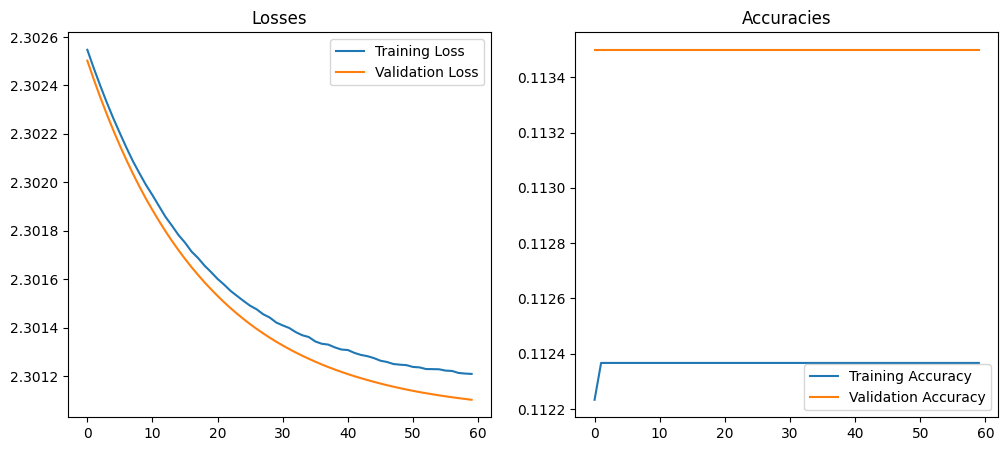

In [10]:
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.legend()
# plt.title('Losses')

# plt.subplot(1, 2, 2)
# plt.plot(train_accuracies, label='Training Accuracy')
# plt.plot(val_accuracies, label='Validation Accuracy')
# plt.legend()
# plt.title('Accuracies')

# plt.show()


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.nn import Module
import torch
from torch.nn import Module, Linear, ReLU



class SimpleNN(Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()  # Add this line to properly initialize Module
        self.fc1 = Linear(input_size, hidden_size)
        self.relu1 = ReLU()
        self.fc2 = Linear(hidden_size, hidden_size)
        self.relu2 = ReLU()
        self.fc3 = Linear(hidden_size, hidden_size)
        self.relu3 = ReLU()
        self.fc4 = Linear(hidden_size, hidden_size)
        self.relu4 = ReLU()
        self.fc5 = Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

class CustomCrossEntropyLoss(Module):
    def __init__(self):
        super(CustomCrossEntropyLoss, self).__init__()

    def forward(self, predicted, target):
        exp_preds = torch.exp(predicted - torch.max(predicted, dim=1, keepdim=True).values)
        probs = exp_preds / torch.sum(exp_preds, dim=1, keepdim=True)
        log_probs = -torch.log(probs[range(target.shape[0]), target])
        loss = torch.sum(log_probs) / target.shape[0]
        return loss

    def backward(self, predicted, target):
        grad = torch.zeros_like(predicted)
        batch_size = predicted.size(0)
        grad[range(batch_size), target] = -1 / predicted[range(batch_size), target]
        grad /= batch_size
        return grad

# Training loop
input_size = 28 * 28
output_size = 10
hidden_size = 32
learning_rate = 0.0003

model_scratch = SimpleNN(input_size, hidden_size, output_size)
criterion_scratch = CustomCrossEntropyLoss()
# optimizer_scratch = CustomSGD(model_scratch.parameters(), lr=learning_rate)

epochs = 60
train_losses_scratch, test_losses_scratch = [], []
train_accuracies_scratch, test_accuracies_scratch = [], []

for epoch in range(epochs):
    model_scratch.train()
    total_loss, correct_train = 0, 0

    for inputs, labels in train_loader:
        # optimizer_scratch.step()
        inputs = inputs.view(inputs.size(0), -1)
        outputs = model_scratch(inputs)
        loss = criterion_scratch(outputs, labels)
        
        # Backward pass
        model_scratch.zero_grad()
        grad_outputs = criterion_scratch.backward(outputs, labels)
        model_scratch.backward(grad_outputs)
        
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / len(train_loader.dataset)
    train_losses_scratch.append(train_loss)
    train_accuracies_scratch.append(train_accuracy)

    # Testing
    model_scratch.eval()
    total_loss, correct_test = 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model_scratch(inputs)
            loss = criterion_scratch(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()

    test_loss = total_loss / len(test_loader)
    test_accuracy = correct_test / len(test_loader.dataset)
    test_losses_scratch.append(test_loss)
    test_accuracies_scratch.append(test_accuracy)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses_scratch, label='Training Loss (Scratch)')
plt.plot(test_losses_scratch, label='Testing Loss (Scratch)')
plt.legend()
plt.title('Loss during Training and Testing (Scratch)')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies_scratch, label='Training Accuracy (Scratch)')
plt.plot(test_accuracies_scratch, label='Testing Accuracy (Scratch)')
plt.legend()
plt.title('Accuracy during Training and Testing (Scratch)')

plt.show()


AttributeError: 'SimpleNN' object has no attribute 'backward'

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
class Loss:
    def __init__(self):
      super(Loss, self).__init__()

    def softmax(self, x):
        exp_x = torch.exp(x - x.max(dim=1, keepdim=True).values)
        return exp_x / exp_x.sum(dim=1, keepdim=True)

    def forward(self, outputs, labels):
        # Calculate softmax explicitly
        softmax_outputs = self.softmax(outputs)

        # Calculate cross-entropy loss
        batch_size = len(outputs)
        loss = -torch.log(softmax_outputs[range(batch_size), labels]).mean()

        self.softmax_outputs = softmax_outputs
        self.labels = labels

        return loss


# Cross Entropy Loss Formula

The cross-entropy loss for a single example in a classification problem is given by:

\[ \text{Cross Entropy Loss} = -\sum_{i=1}^{C} y_i \cdot \log(p_i)\]

where:
- \( C \) is the number of classes.
- \( y_i \) is a binary indicator (0 or 1) if class \( i \) is the correct classification for the example.
- \( p_i \) is the predicted probability of class \( i \) for the example.


In [3]:
class Activation:
    def forward(self, x):
        self.input = x
        return torch.max(x, torch.zeros_like(x))

    def backward(self, grad_output):
        grad_input = torch.where(self.input > 0, grad_output, torch.zeros_like(grad_output))
        return grad_input


In [4]:
class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.weight = nn.Parameter(torch.randn(out_features, in_features) * 0.01)
        self.bias = nn.Parameter(torch.zeros(out_features))

    def forward(self, x):
        return torch.matmul(x, self.weight.t()) + self.bias


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation):
        super(NeuralNetwork, self).__init__()
        self.fc1 = Linear(28 * 28, 32)
        self.activation1 = activation
        self.fc2 = Linear(32, 32)
        self.activation2 = activation
        self.fc3 = Linear(32, 32)
        self.activation3 = activation
        self.fc4 = Linear(32, 32)
        self.activation4 = activation
        self.fc5 = Linear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.activation1.forward(self.fc1(x))
        x = self.activation2.forward(self.fc2(x))
        x = self.activation3.forward(self.fc3(x))
        x = self.activation4.forward(self.fc4(x))
        x = self.fc5(x)
        return x


In [6]:
torch.manual_seed(42)

In [7]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
Activatio = Activation()
model = NeuralNetwork(activation=Activatio)

criterion = Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0003)

# Training loop
num_epochs = 60
train_losses, val_losses, test_losses = [], [], []
train_accuracies, val_accuracies, test_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    total_loss, correct_train = 0, 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss, correct_val = 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = correct_val / len(test_loader.dataset)

    # Testing
    model.eval()
    test_loss, correct_test = 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_test += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = correct_test / len(test_loader.dataset)

    # Store metrics for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs}: "
          f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, "
          f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label='Testing Loss')
plt.legend()
plt.title('Losses')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.legend()
plt.title('Accuracies')

plt.show()


TypeError: 'Loss' object is not callable

- Testing Loss and Validation Loss are the same, and hence are coinciding with each other in the graph
- Testing Accuracy and Validation Accuracy are the same, and hence are coinciding with each other in the graph


In [ ]:
print(train_losses)
print(val_losses)
print(test_losses)
print(train_accuracies)
print(val_accuracies)
print(test_accuracies)
